# Create a classification model that will predict the class of incoming traffic to the firewall.

<p>To work in a clear and organized way, we will use CRISP-DM (Cross-Industry Standard Process for Data Mining), a framework widely used for data mining and analysis projects. According to Chumbar (2023):"It is a cyclical process that provides a structured approach to planning, organizing, and implementing a data mining project.The process consists of six major phases:" </p>

<b>1. Business Understanding:</b>
<p>In the scenario presented, the objective is to create a classification model to predict the class of incoming traffic on a firewall. </p>
<b>2. Data Understanding:</b>
<p>Understanding the distribution of these categories and the characteristics of other features.The dataset contains over 65K attempts to access a firewall, with a single categorical feature "Action" containing four categories: "allow, deny, drop, reset-both".</p>
<b>3. Data preparation:</b>
<p>It involves cleaning, transforming, and preprocessing the data to make it suitable for analysis. This includes dealing with missing values, encoding categorical variables, scaling numeric features, and splitting data into training and testing sets.</p>

<b>4. Modeling:</b>
</p>The modeling phase involves selecting appropriate modeling techniques,at least two classification algorithms need to be implemented and tested using the training data.</p>

<b>5. Evaluation:</b>
    
<p>The performance of the models is evaluated using appropriate metrics and evaluation techniques.</p>
<b>6. Deployment:</b>
<p>The final classification algorithm with the highest performance in the test suite would be selected for deployment to predict the class of incoming firewall traffic in real-world scenarios.</p>

## Data understanding

import `Pandas` library to structure the data in Dataframe for better understanding.
import `seaborn` and `matplotlib` to plot some visualization.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 ### Create a variable to get `Log2.csv` file in a DataFrame and read the first five rows

In [37]:
df = pd.read_csv('log2.csv')
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


 ### The `info()` method It provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage.

In [38]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


(65532, 12)

### The `describe()`  method It calculates summary statistics for numeric columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum values, and quartiles.

In [39]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


The `isna()` check in if there is any missing value or NA()

In [40]:
df.isna().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

The `df.duplicated()` to check duplicate values

In [41]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
65527    False
65528    False
65529    False
65530    False
65531     True
Length: 65532, dtype: bool

The df_duplicates_cleaned variable to get all unique values after deletion.

In [42]:
df_duplicates_cleaned = df.drop_duplicates()
df_duplicates_cleaned.info()
df_duplicates_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57170 entries, 0 to 65530
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           57170 non-null  int64 
 1   Destination Port      57170 non-null  int64 
 2   NAT Source Port       57170 non-null  int64 
 3   NAT Destination Port  57170 non-null  int64 
 4   Bytes                 57170 non-null  int64 
 5   Bytes Sent            57170 non-null  int64 
 6   Bytes Received        57170 non-null  int64 
 7   Packets               57170 non-null  int64 
 8   Elapsed Time (sec)    57170 non-null  int64 
 9   pkts_sent             57170 non-null  int64 
 10  pkts_received         57170 non-null  int64 
 11  Action                57170 non-null  object
dtypes: int64(11), object(1)
memory usage: 5.7+ MB


(57170, 12)

</p> Pairplot helps us visualize the relationship of our feature dataset</p>

* First we created a list with dataset columns
* df_sample it'll get a  `frac=0.1` 10% amount of dataset and random_state to generate always the same random numbers.
* The creation of pairplot was based from this source: 
    https://seaborn.pydata.org/generated/seaborn.pairplot.html

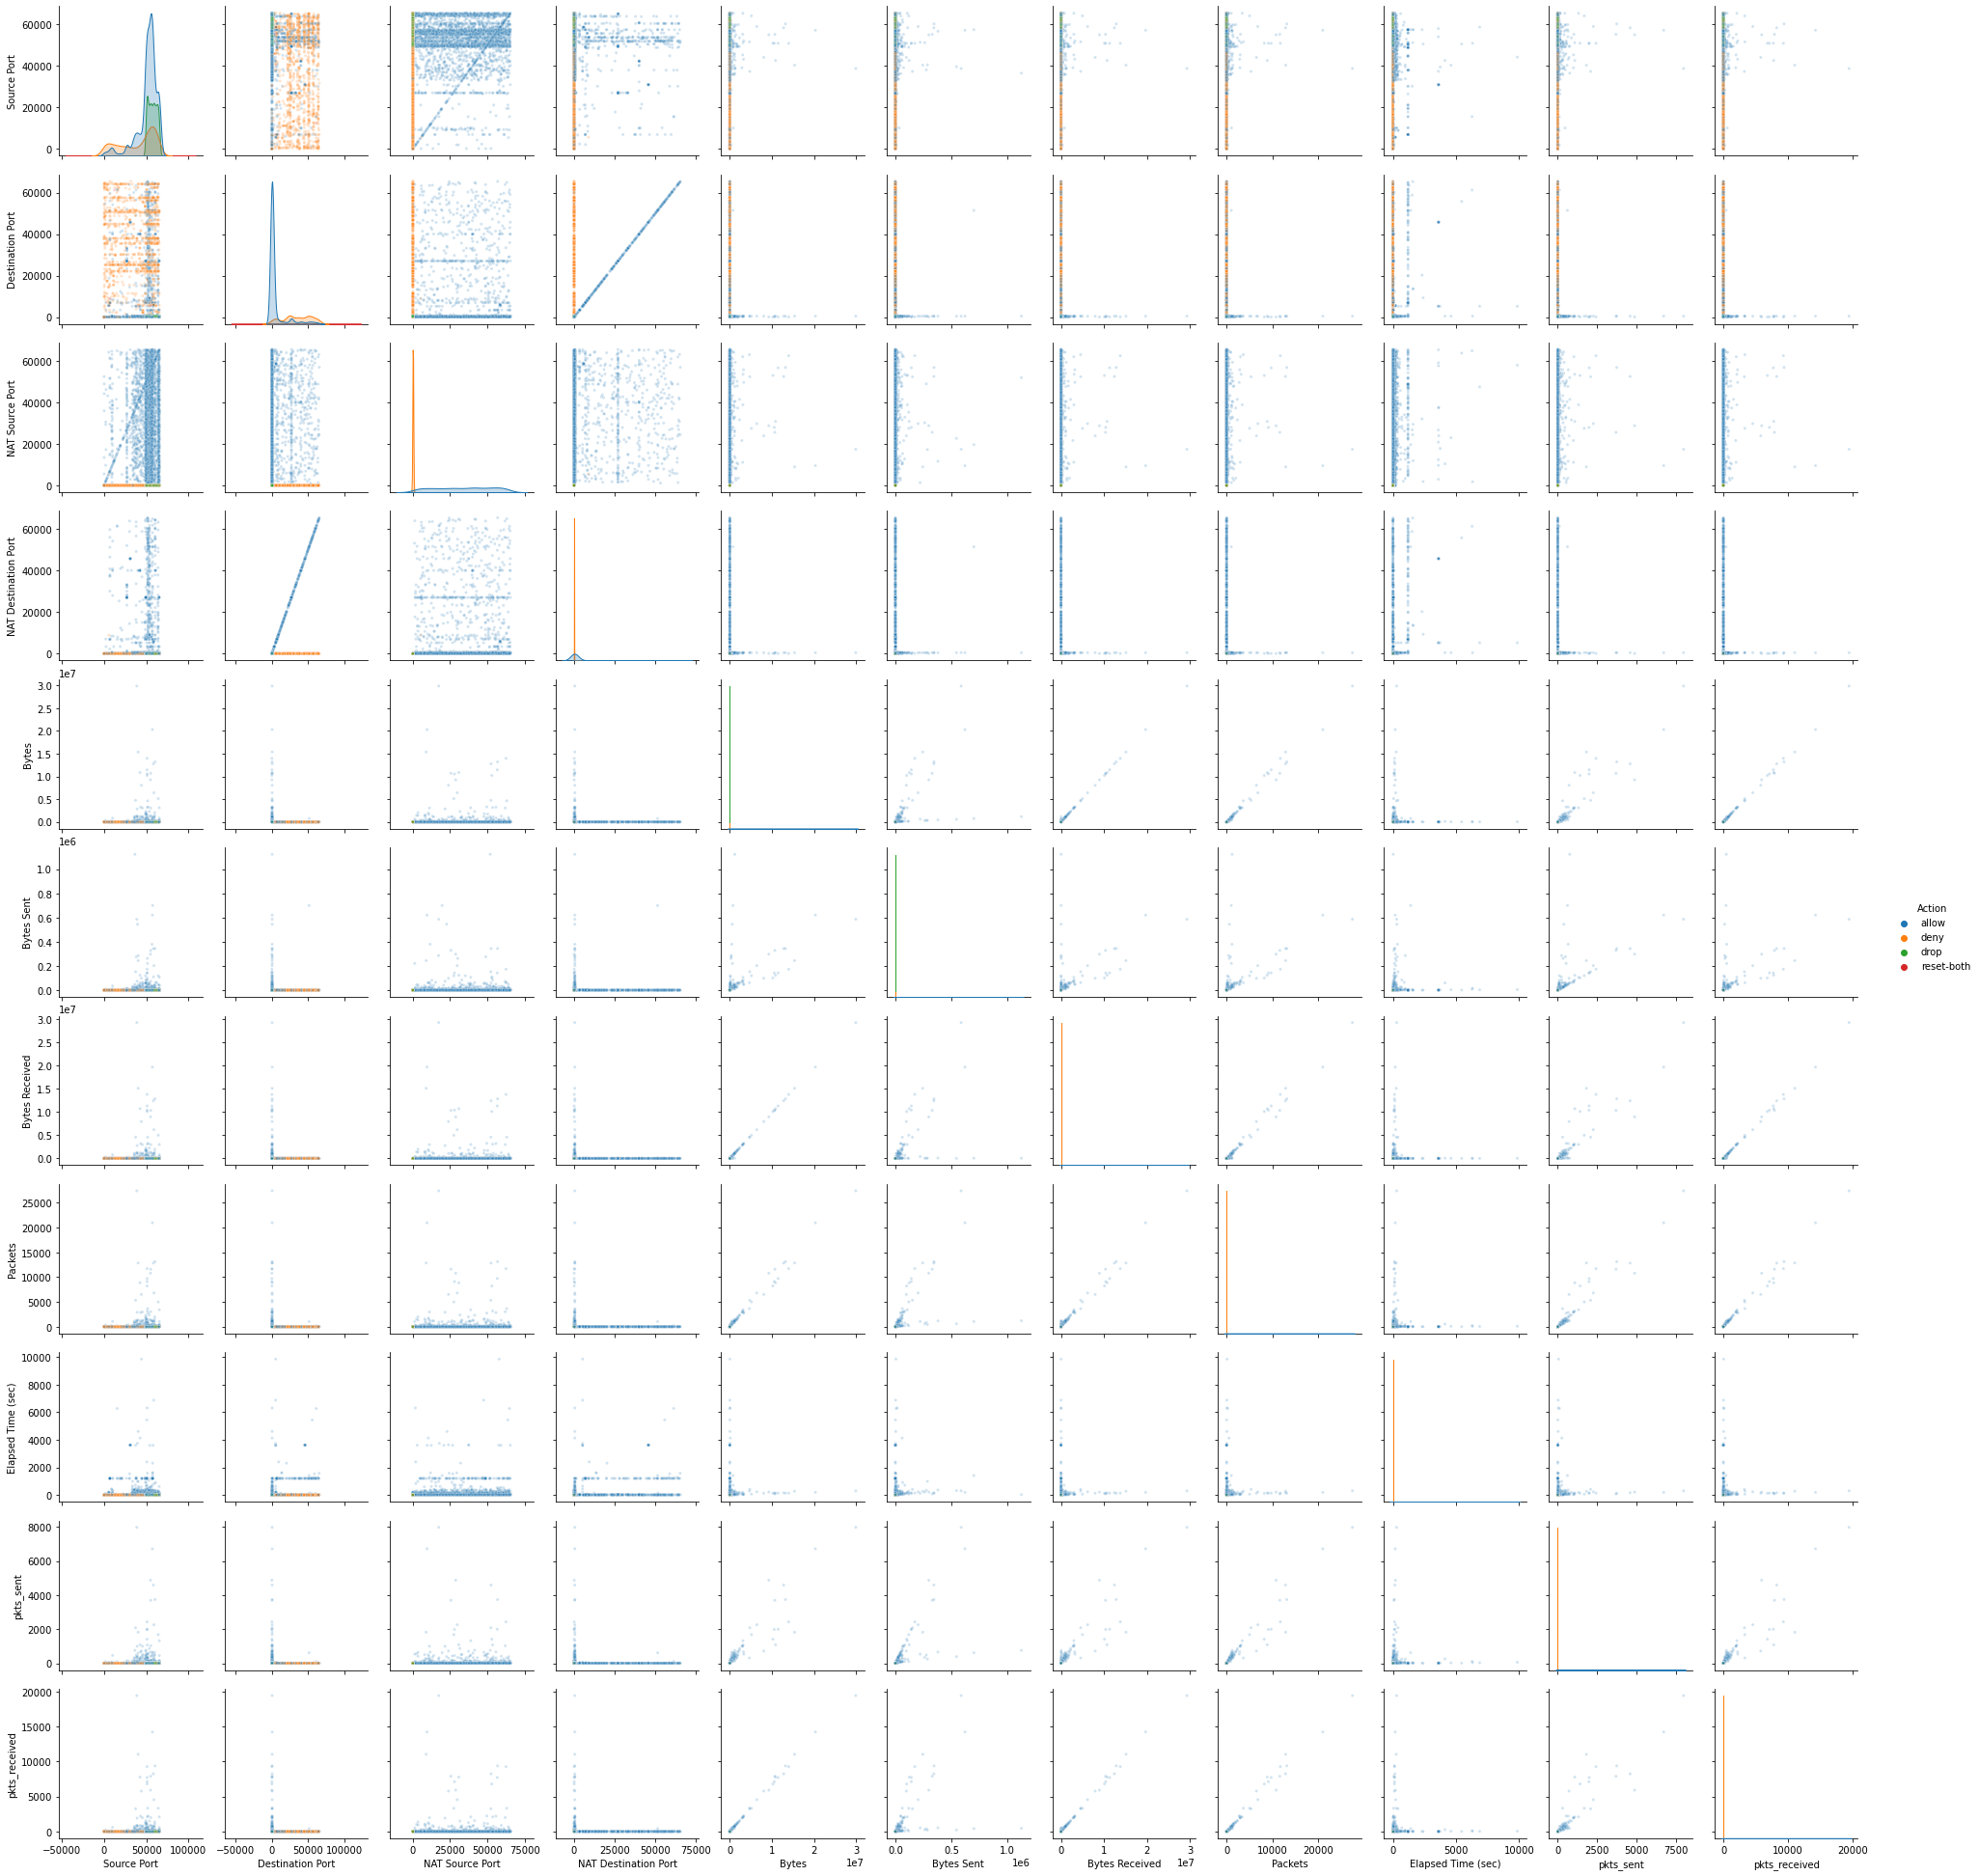

In [26]:
columns_df = ['Source Port', 'Destination Port','NAT Source Port','NAT Destination Port' ,
                       'Bytes', 'Bytes Sent','Bytes Received','Packets', 'Elapsed Time (sec)', 
                       'pkts_sent', 'pkts_received','Action']

df_sampled = df[columns_df].sample(frac=0.1, random_state=1)

sns.pairplot(df_sampled, hue="Action", markers=".", plot_kws={'alpha':0.2}, diag_kind='kde')

plt.show()

<p>By analyzing the pairplot visualization, we can better understand how our data is spread across the features of the
dataset, some of them are grouped by cluster, some of them also show linearity, so we can suggest some algorithm models to do our classification:</p>
    
* <b>Random Florest :</b> Some features have skewed distributions. For example, it appears that 'Bytes', 'Bytes Sent' and 'Bytes Received' are skewed to the right. 
* <b>Support vector Machine and k-nearest neighbors :</b>They are very good for distance-based algorithms as we have some features with these aspects, but standardization is needed to transform the data. 
* <b>Logistic Regression :</b> As we have some features with linearity, it would be good to apply Logistic Regression.

## Data preparation:

### Correlation

<p>To find out which feature has the strongest influence in target variable `Action` we can use correlation coefficient. According to research (Nickolas, 2021)" Correlation coefficients are indicators of the strentgh of the linear relationship between two different variables, x and y.A linear correlation coefficient that is great than zero indicates a positive relationship.A value that is less than zero signifies a negative relationship."</p>
<p>Before calculating the correlation coefficient between the "Action" feature and other numerical features, we need to encode the categorical feature "Action" in numerical format.</p> For this we can import LabelEncoder class from `Scikit-learn` Library to implement Machine learning models.

<p>

* First we need import the LabelEncoder from sklern

* Created a variable call Label_encoder to get LabelEncoder() method

* df['Action'] variable will get return encoded values by fit_transform() method

* for loop to print unique values where "classes_" is used to tranform non-numerical labels to numerical :</p>
  
  * allow assigns as integer "0"
  * deny assigns as interger "1"
  * drop assigns as interger "2"
  * reset-both as interger   "3"

</p>Below are the lines of code to encode the categorical value into values ​​encoded with the LabelEncoded class :</p>


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Action'] = label_encoder.fit_transform(df['Action'])

print("Mapping of Encoded Values to Original Categories:")
for encoded_Action, original_category in enumerate(label_encoder.classes_):
    print(f"Encoded Action value: {encoded_Action}, Original Category action : {original_category}")

Mapping of Encoded Values to Original Categories:
Encoded Action value: 0, Original Category action : allow
Encoded Action value: 1, Original Category action : deny
Encoded Action value: 2, Original Category action : drop
Encoded Action value: 3, Original Category action : reset-both


After encoding our Action category feature in numeric, we can apply the correlation coefficient:

<p>So the correlation varible got correlation method `df.corr()`  from Pandas dataFrame libraries and make a correlation of all columns, sort_values() with a parameter ascending= false is going to sorts values in descending order, as we can see below in the code line :</p>


In [8]:
correlation = df.corr()['Action'].sort_values(ascending=False)
print(correlation)

Action                  1.000000
Destination Port        0.095110
Source Port             0.038343
Bytes Sent             -0.004570
pkts_sent              -0.009842
Bytes                  -0.013546
Packets                -0.015562
pkts_received          -0.021679
Bytes Received         -0.023794
Elapsed Time (sec)     -0.170684
NAT Destination Port   -0.214765
NAT Source Port        -0.686893
Name: Action, dtype: float64


<p>As we can see, the <b>NAT Source Port</b> has the highest negative value, 
which means it is the only one that has the strongest influence on the target variable <b>Action</b>.
Then in the next heatmap, a plot to get a better understanding of the correlation between feature and action</p>

* First import seaborn and set sns as variable, also we do this with matplotlib and  set plt as variable.
* figure() method with parameter figsize to set out the size of plot.
* heatmap() method for creating 2D clustered heatmaps, with parameters df.corr() calculating the matrix correlation,sort_values to get Action values and display in descending order, cmap to set the colors, and annot set as true to display correlation values.
* plt.title() this will be display the title's name of heatmap plot.
* plt.show to display the plot

<p>Below the lines of code and the heatmap plot: </p>

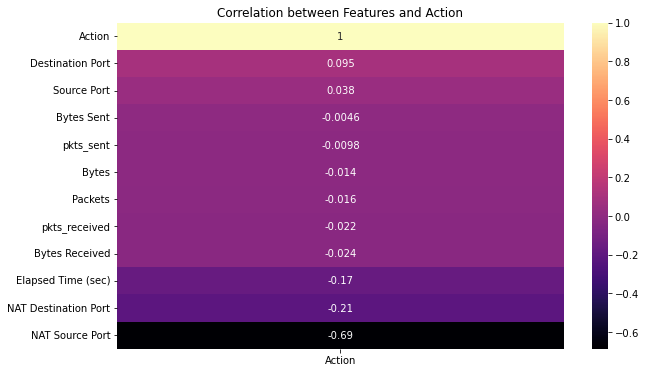

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['Action']].sort_values(by='Action', ascending=False), cmap='magma', annot=True)
plt.title('Correlation between Features and Action')
plt.show()

<p>In this case, the negative correlation coefficient between “Action” and “NAT Source Port” indicates an inverse relationship between these two variables.This means that as the "NAT Source Port" value increases (or decreases), the probability of certain actions ("allow", "deny", "discard", "reset both") may change accordingly.</p>
<p>Just a simply example of comparison a student's decreased attendance as a result of missing classes would indeed be an example of a negative correlation. perhaps in another context we could discard some feature such as bytes, source port that has a low correlation with the Action feature.</p>

<p>Below you can see the correlation between the features by `df.corr()` method provided by pandas where:</p>

* we set the size by figure()
* Correlation_matrix varible get coor()method from pandas.
* heatmap() method for creating 2D clustered heatmaps, with parameters correlation_matrix variable, annot= true to display the plot and cmap to the display the colors
* plt.title to display the plot's title.
* plt.show() to display the plot

<p>As you can see below:</p>

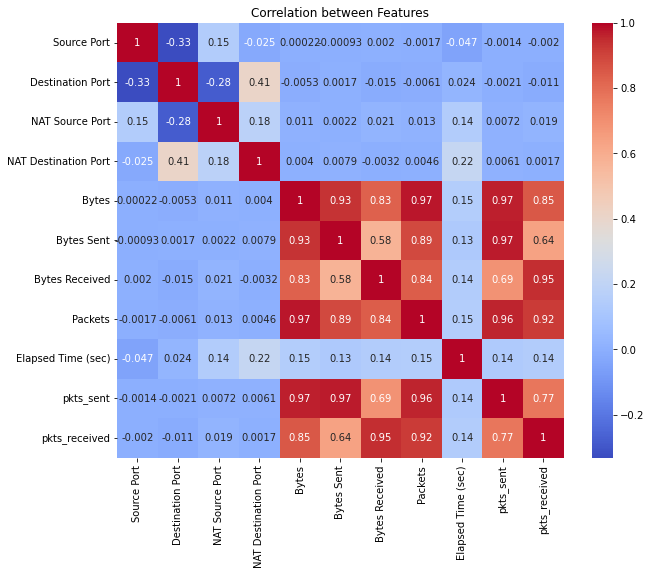

In [77]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

###  Feature Scaling

<p>In this analysis we intend to use some machine learning algorithms such as support vector machines, K-nearest neighbors. According to Shivanipickl (2023) "It can lead to faster convergence and more accurate predictions, especially when using algorithms like k-nearest neighbors, support vector machines, and neural networks."
When training a machine learning model, features with larger scales can dominate those with smaller scales, leading to biases in the model.For example, we have values in Packets feature with numeric values "24" while in the Source Port feature with numeric values "49437", so the variation is large.</p>
<p>Splitting data into training and testing sets before scaling is a standard practice in machine learning to prevent data leakage</p>

 1. To start, we will first define the 'X' where we will get the df dataset and discard only the action feature.
 
 2. 'Y' will only have the df dataset feature action.
<p>As you can see below in the line codes:</p> 

In [44]:
X = df.drop(columns=['Action'])
y = df['Action']

<p>To split the data into training and testing sets, we will import the train_test_split function from scikit-learn.</p>

* Where the X_train and y_train will 80% data and X_test and y_test will get 20% of data.

* train_test_split() with parameters where 'X' contains the feature variables and 'y'contains the target variable.

* test_size=0.2 parameter make sure that 20% of the data will be reserved for testing, while the remaining 80% will be used for training.
* random_state=42, parameter define the data split will be the same every time we run the code,

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p>So, after we split our dataset into training and testing tests, let's explain how standardization works.
Standardization (or Z-score normalization) transforms the data so that it has a mean of 0 and a standard deviation of 1. It subtracts the mean of each feature and divides it by the feature's standard deviation.According to research (Gupta, 2023)"This technique rescales a feature value so that it has a distribution with 0 mean value and variance equal to 1."</p>

* The train_data variable will be set to get X_train after split the data and  display the first 5 rows of the dataset by head(). 

<p>As you can see in the following line of code:</p>

In [46]:
train_data=pd.DataFrame(X_train)
train_data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
50640,49437,443,4843,443,9621,2347,7274,24,78,12,12
25967,60939,445,0,0,70,70,0,1,0,1,0
3446,49437,53,49111,53,498,204,294,6,30,3,3
10689,64040,12226,50739,12226,70,70,0,1,4,1,0
52462,29021,23,0,0,60,60,0,1,0,1,0


<p>We calcule the mean  of all features first:</p>

* train_mean variable will get train_data.mean() it calculate the means of all features inside train_data set

<p>As you can see bellow:</p>

In [47]:
train_mean = train_data.mean()
print(train_mean) 

Source Port             49374.340353
Destination Port        10572.730815
NAT Source Port         19283.225446
NAT Destination Port     2649.932227
Bytes                   99854.974211
Bytes Sent              24924.768622
Bytes Received          74930.205589
Packets                   105.082632
Elapsed Time (sec)         66.082651
pkts_sent                  43.225656
pkts_received              61.856977
dtype: float64


<p> Now we calculating the standard deviation</p>

* Create a variable train_std which will get train_data.std(), "the std() method will calculate the standard deviation"

In [48]:
train_std =train_data.std()
print(train_std)

Source Port             1.525478e+04
Destination Port        1.845986e+04
NAT Source Port         2.195272e+04
NAT Destination Port    9.695278e+03
Bytes                   6.201989e+06
Bytes Sent              4.246308e+06
Bytes Received          2.633023e+06
Packets                 5.636700e+03
Elapsed Time (sec)      3.087373e+02
pkts_sent               3.570313e+03
pkts_received           2.400215e+03
dtype: float64


<p>To calculating Z-score will subtract features by means and divided by standard deviation</p>

* Create a variable Z_score to get z_score value which is train_data subtract by train_mean and divided by train_std.

as you can see the line of code bellow:

In [49]:
Z_score=(train_data - train_mean) / train_std
Z_score.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
50640,0.004108,-0.548744,-0.657787,-0.227630,-0.014549,-0.005317,-0.025695,-0.014385,0.038600,-0.008746,-0.020772
25967,0.758101,-0.548635,-0.878398,-0.273322,-0.016089,-0.005853,-0.028458,-0.018465,-0.214042,-0.011827,-0.025771
3446,0.004108,-0.569871,1.358728,-0.267855,-0.016020,-0.005822,-0.028346,-0.017578,-0.116872,-0.011267,-0.024522
10689,0.961381,0.089560,1.432887,0.987704,-0.016089,-0.005853,-0.028458,-0.018465,-0.201086,-0.011827,-0.025771
52462,-1.334227,-0.571496,-0.878398,-0.273322,-0.016091,-0.005856,-0.028458,-0.018465,-0.214042,-0.011827,-0.025771


<p>So, Now we can calculate standardization with StandardScaler class from sklearn</p>

* First we need to import StandardScaler from sklearn
* Create a "scaler variable" we will get StandardScaler() methods
* X_train wiil get the data properly tranformed by fit_transform()
* X_test will get the data properly transformed by transform()

<p>The fit_transform and transform methods ensure that both sets
are scaled consistently, preventing any leakage of data from the testing set to the training set.</p>

* The X_train_data variable will be set to get X_train after scaling and display the first 5 rows of the dataset by head(). 

<p>As you can see in the following line of code:</p>

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_data=pd.DataFrame(X_test)
X_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.127087,2.902231,-0.878406,-0.273325,-0.016090,-0.005854,-0.028458,-0.018465,-0.214044,-0.011827,-0.025772
1,0.037671,-0.548749,-0.550152,-0.227632,-0.015341,-0.005656,-0.027013,-0.015449,0.074230,-0.009586,-0.022022
2,0.963357,-0.569876,0.358081,-0.267858,-0.016059,-0.005844,-0.028402,-0.018288,-0.116873,-0.011827,-0.025355
3,0.780396,-0.548641,-0.878406,-0.273325,-0.016090,-0.005854,-0.028458,-0.018465,-0.214044,-0.011827,-0.025772
4,0.171008,-0.548749,0.365233,-0.227632,-0.012238,-0.004878,-0.020959,-0.011192,-0.065048,-0.006225,-0.017022


<p>After using sklearn's StandardScaler() method, we can make a comparison between our X_train_data and Z_score datasets
and we can see that we get the same values</p>

## Modeling

<p>As we have a classification problem we're going to use some classification algorithms.According to research(Banoula, 2023)   "In simple words, classification is a type of pattern recognition in which classification algorithms are performed on training data to discover the same pattern in new data sets."</p>

<p>To use algorithms methods first we need to import them from sklearn:</p>
  

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

<p>So first we create a dictionary where "key name" will be method name and "value" will get method instantiated from sklearn.</p>

* The choose of Support vector Machine() methods was because as It is suitable for problems where the number of features is not extremely high, as in this case with 12 features.

* K-Nearest Neighbors is suitable for multi-class classification tasks as it can accommodate any number of classes without modification. It identifies the closest points in the training dataset and uses their classes to predict the class or value of the new data point.

* Random forest extension from multiple decision trees, in other words, randomly select a subset of features (a subset of the total available features) to consider when splitting the node.

* Logisct Regression It is especially useful in binary classification tasks where the goal is to categorize data into one of two classes.

Then "fit_and_score function with parameters from models dictionary, and training and test sets

* np.random.seed() method just make sure to get the same random number
* empty dictionary to get model key and values scores after modeling.
* for loop to get key and value from models dictionary by items methods.
* model.fit for training  X_train and y_train sets by methods instantiated in dictionary.
* model_scores variable will get scores from X_test and y_test.
* return model_scores to access and analyze the performance of each model outside of the function.

<p>The following lines of codes was taken from :</p>

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification.ipynb 

In [55]:
import numpy as np
models = {"Support vector Machine ": SVC(),
           "KNN":KNeighborsClassifier(),
           "Random Forest": RandomForestClassifier(),
           "Lg":LogisticRegression(max_iter=1000)}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    

    np.random.seed(42)
    
    model_scores = {}
    model_reports ={}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        model_scores[name] = model.score(X_test, y_test)
        model_reports[name] = classification_report(y_test, y_preds,zero_division=1)
        
    return model_scores, model_reports

<p>To display model scores and compare the model_scores dictionary of the fit_and_score function.</p>

In [56]:
model_scores, model_reports = fit_and_score(models=models,
                                            X_train=X_train,
                                            X_test=X_test,
                                            y_train=y_train,
                                            y_test=y_test)
model_scores

{'Support vector Machine ': 0.9881742580300603,
 'KNN': 0.9972533760585947,
 'Random Forest': 0.9984740978103304,
 'Lg': 0.9857328145265889}

For loop to get the key name and score value after fitting them and rounding to decimal values.

In [57]:
for name, score in model_scores.items():
            print(f"{name}: {(score)*100:.2f}")

Support vector Machine : 98.82
KNN: 99.73
Random Forest: 99.85
Lg: 98.57


<p>All Four models we obtained achieved high performance scores, but in classification problems, this doesn't necessarily mean they are good enough. To verify this, we can use various metrics. According to Selvaraj (2022): 'A “good” model is subjective and highly dependent on your use case. In classification problems, for instance, high accuracy alone isn’t indicative of a good model. As a data scientist, you need to review metrics like precision, recall, and F1-Score to get a better idea of how well your model is performing."<p>
<p>Below the classification_reports of All the models:</p>

* For loop to get the key name and report metrics from model_reports dictionary.

In [58]:
for model_name, report in model_reports.items():
    print(f"{model_name} Classification Report: \n{report}")

Support vector Machine  Classification Report: 
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7545
        deny       0.99      0.96      0.98      2994
        drop       0.96      1.00      0.98      2562
  reset-both       1.00      0.00      0.00         6

    accuracy                           0.99     13107
   macro avg       0.99      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

KNN Classification Report: 
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       0.99      0.99      0.99      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      0.00      0.00         6

    accuracy                           1.00     13107
   macro avg       1.00      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Random Forest Classification Report: 
              pr

### Evaluation Criteria
<b>Precision:</b>The accuracy of positive predictions,it is used to calculate the model's ability to classify positive values correctly.

<b>Recall:</b>It is the ability to used to calculate the model's ability to predict positive values.

<b>F1-Score:</b>It is the ability to find harmonic mean of recall and Precision.

<b>Support</b>: The number of the actual events of the class in dataset.

### Best Performing Models:
<p>Random Forest emerges as the best overall model. It not only achieves perfect scores for precision, recall and f1 score for most classes but also performs significantly better on class 4 compared to SVM,KNN,LG.</p> as you can see bellow:

* <b>Precision:</b> Perfect (1.00) for all classes.
* <b>Recall:</b> High across all classes, including a notably higher recall for class 3 (0.67) compared to other models.
* <b>F1-Score:</b> High for all classes, significantly higher for class 3 compared to other models (0.80).
* <b>Overall Accuracy:</B> 1.00 (100%)

## Hyperparameter tuning

<p>As we obtained the best results for RandomForest and KNN, let's try to improve them with some hyperparameter tuning. Tuning the model works similarly to setting an oven's temperature: if it's too high, the cake will burn; if too low, the cake will be unbaked. According to Navas (2022): "That combination of hyperparameters maximizes the model’s performance, minimizing a predefined loss function to produce better results with fewer errors."</p>

Let's get starting tuning by KNN:

*  Train_scores and test_scores to get train and test scores
*  Create a list of different values for number of neighbors(must be odd numbers to avoid ties)
*  Setup KNN instance
*  Loop through different n_neighbors
*  Fit the algorithm
*  Update the training scores list
*  Update the test scores list


The following line of codes we taken from : https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7

In [59]:
train_scores = []
test_scores = []


neighbors = range(1,21)


knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    
    knn.fit(X_train, y_train)
    
    
    train_scores.append(knn.score(X_train, y_train))
    
    
    test_scores.append(knn.score(X_test, y_test))

After tunning KNN let's plot train score and test score
* first we set plt variable with parameters neighbors,train and test score, labels and colors
* xticks to set up the number of with np.arange to creates a array from 1 to 20
* xlabels and y labels to set up x and y labels
* legend() set as default position and deploy it.

KNN score on the test data after tunning : 99.77%
KNN score on the test data after tunning : 99.96%


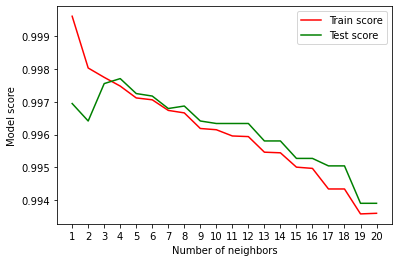

In [62]:
plt.plot(neighbors, train_scores, label="Train score",color="red")
plt.plot(neighbors, test_scores, label="Test score", color="green")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"KNN score on the test data after tunning : {max(test_scores)*100:.2f}%")
print(f"KNN score on the test data after tunning : {max(train_scores)*100:.2f}%")

<p>To tunning our randomForest modulos we're going to RandomizedSearchCv. According to reaserch(Koehrsen, 2018): "Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values."</p>

First of all we need to import from RandomizedSearCV from Scklearn

Set up hyparameter grid for `param_distribuions`:
* <b>n_estimators:</b> Number of trees in the forest.
* <b>max_features:</b> The number of features to consider when looking for the best split.
* <b>max_depth:</b> The maximum depth of the tree.
* <b>min_samples_split:</b> The minimum number of samples required to split an internal node.
* <b>min_samples_leaf:</b> The minimum number of samples required to be at a leaf node.
* <b>bootstrap:</b>Whether bootstrap samples are used when building trees.

In [63]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions= {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


So We're going to set up RandomizedSearcv into our RandomForestClassifier:

* %%time to display the time spending to set up RandomizedSearchCV 
* Set up RandomizedSearchCV into rf_cv with appropriate parameters('n_iter' to defines the number the iteration, 'cv=3' number of folders, 'verbose=2' to display the score and 'n_jobs=-1' make sure the all processor will be used.)
* Fit the random search model

In [64]:
%%time
rf_model = RandomForestClassifier()


rf_cv = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)


rf_cv.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: total: 7.7 s
Wall time: 23min 10s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

Next line of code below to print the best parameters and estimators after tuning:

In [69]:
print("Best parameters found: ", rf_cv.best_params_)
best_random_florest = rf_cv.best_estimator_
print('--------------------- X ------------------------------------')
print("Best best_estimator found: ", best_random_florest)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}
--------------------- X ------------------------------------
Best best_estimator found:  RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2)


* y_preds to X_test predict values
* classification_report to get ideal how our models perfomances after tuning

In [70]:
y_preds = best_random_florest.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      0.67      0.80         6

    accuracy                           1.00     13107
   macro avg       1.00      0.92      0.95     13107
weighted avg       1.00      1.00      1.00     13107



In [72]:
print(f"RandomForest scores after hyperparameter tunnig tests datasets: {rf_cv.score(X_test,y_test)*100:.2f}%")
print(f"RandomForest scores after hyperparameter tunnig training datasets: {rf_cv.score(X_train,y_train)*100:.2f}%")

RandomForest scores after hyperparameter tunnig tests datasets: 99.92%
RandomForest scores after hyperparameter tunnig training datasets: 99.90%


<p>The accuracy of the test dataset <b>99.92%</b> and training dataset <b>99.90%</b> is exceptionally high.which indicates the performance metrics between the training set and the testing set shows that the model is not overfitting.However, the lower performance in the `reset-both` requires attention category may be due to the small number of samples (only 6 samples in the test set).One way to improve this would be to collec more data samples.

<p>Below the confusion matrix plot to visualizatio True Labels x Predicted Labels:</p>
    
* heatmap() method for creating 2D clustered heatmaps, with parameters cm variable, annot=true to display the values into
the plot and cmap to the display the colors and cbar=False do not display the bar besides of plot.
* plt.title to display the plot's title.
* plt.show() to display the plot    

</p>below you can see the correlation between  Predicted labels X True labels:</p>

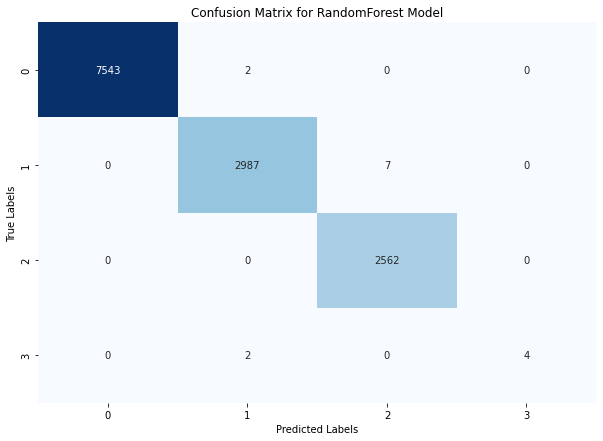

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RandomForest Model')
plt.show()

## Conclusion

In the process of completing this project, I employed the conversational AI tool ChatGPT to gain a clearer understanding of complex statistical methods, specifically random cross-validation and classification reporting. This AI tool helped break down the concepts and provided examples that improved my understanding of the material.Furthermore, the lectures and materials provided by Professor David McQuaid proved invaluable.

## Reference:

Banoula, M. (2023). Classification in Machine Learning | The Best Classification Models. [online] Simplilearn.com. Available at: https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning [Accessed 9 Apr. 2024].

Chumbar, S. (2023). The CRISP-DM Process: A Comprehensive Guide. [online] Medium. Available at: https://medium.com/@shawn.chumbar/the-crisp-dm-process-a-comprehensive-guide-4d893aecb151 [Accessed 1 Apr. 2024].


Gupta, B. (2023). Feature Scaling in Machine Learning. [online] Scaler Topics. Available at: https://www.scaler.com/topics/machine-learning/feature-scaling-in-machine-learning/ [Accessed 5 Apr. 2024].

Navas, J. (2022). Anyscale - What is hyperparameter tuning? [online] Anyscale. Available at: https://www.anyscale.com/blog/what-is-hyperparameter-tuning [Accessed 12 Apr. 2024].

Nickolas, S. (2021). What does it mean if the correlation coefficient is positive, negative, or zero? [online] Investopedia. Available at: https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp [Accessed 3 Apr. 2024].

Koehrsen, W. (2018). Hyperparameter Tuning the Random Forest in Python. [online] Medium. Available at: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 [Accessed 12 Apr. 2024].

Selvaraj, N. (2022). 8 Machine Learning Models Explained in 20 Minutes. [online] datacamp. Available at: https://www.datacamp.com/blog/machine-learning-models-explained [Accessed 11 Apr. 2024].

Shivanipickl (2023). What is Feature Scaling and Why Does Machine Learning Need It? [online] Medium. Available at: https://medium.com/@shivanipickl/what-is-feature-scaling-and-why-does-machine-learning-need-it-104eedebb1c9 [Accessed 5 Apr. 2024]